### Project 2 - Predicting Hospital Readmissions

* Problem: Predict hospital readmissions within 30 days.
* Objective: Build a predictive model for high-risk patients.
* Tasks:
    - Data Preprocessing
    - Feature Engineering
    - Model Building
    - Model Evaluation


In [741]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [742]:
import warnings
warnings.filterwarnings("ignore")

In [743]:
raw_df = pd.read_csv("data/hospital_readmissions.csv")

In [744]:
raw_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [745]:
#shape

In [746]:
raw_df.shape

(1000, 13)

In [747]:
#info

In [748]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [749]:
#null

In [750]:
raw_df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [751]:
#unique

In [752]:
raw_df.nunique()

Patient_ID               1000
Age                        68
Gender                      3
Admission_Type              3
Diagnosis                   4
Num_Lab_Procedures         99
Num_Medications            30
Num_Outpatient_Visits       5
Num_Inpatient_Visits        5
Num_Emergency_Visits        5
Num_Diagnoses               9
A1C_Result                  2
Readmitted                  2
dtype: int64

In [753]:
new = raw_df.drop(columns="Patient_ID", axis=1)
for column in new.columns:
    unique_values = raw_df[column].unique()
    print(f"'{column}':\n {unique_values}\n")

'Age':
 [ 69  32  78  38  41  20  39  70  19  47  55  81  77  50  75  66  76  59
  79  64  68  72  24  56  35  21  31  26  61  25  52  53  67 150  65  57
  43  58  46  62  82  18  80  28  22  45  29  51  40  54  44  60  30  49
  83  74  23  73  71  36  34  33  37  84  48  42  63  27]

'Gender':
 ['Other' 'Female' 'Male']

'Admission_Type':
 ['Emergency' 'Urgent' 'Elective']

'Diagnosis':
 ['Heart Disease' 'Diabetes' 'Injury' 'Infection']

'Num_Lab_Procedures':
 [33 81 75 77 50 11 95 28 70 41 16 68 99 48 56 64 59 90 62 76 89 18 19 87
 55 82 26  6  4 29 98 17 43 80 66 34  8 13 94 96 65 39 84 88 86 93 44  9
 37 74 36 92 42 85 72 91 22 27 67 45 10 54  1 32 71 20 35 78 53 58  5 69
 51 21 60 47 40 23 15 46 24 63 61 57 49  7 38  3 30 25 31 52 73 83 14 97
  2 12 79]

'Num_Medications':
 [ 2 10 29 11 25 20 16 19 23 24 14 28  5 27 21 12 18  4 22 17  6 35  9  1
  7 15  8  3 26 13]

'Num_Outpatient_Visits':
 [4 2 3 1 0]

'Num_Inpatient_Visits':
 [1 4 0 3 2]

'Num_Emergency_Visits':
 [1 3 4 0 2]

'

## Handling Missing Values

In [754]:
# Fill null values with a placeholder value
raw_df['A1C_Result'].fillna('Unknown', inplace=True)

In [755]:
raw_df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

## Handling Categorical Features

In [756]:
# 'Gender': ['Other' 'Female' 'Male']

raw_df["Gender"]= LabelEncoder().fit_transform(raw_df["Gender"])

raw_df["Gender"].unique()

array([2, 0, 1])

In [757]:
# 'Admission_Type': ['Emergency' 'Urgent' 'Elective']

raw_df["Admission_Type"]= LabelEncoder().fit_transform(raw_df["Admission_Type"])

raw_df["Admission_Type"].unique()

array([1, 2, 0])

In [758]:
# 'Diagnosis': ['Heart Disease' 'Diabetes' 'Injury' 'Infection']

raw_df["Diagnosis"]= LabelEncoder().fit_transform(raw_df["Diagnosis"])

raw_df["Diagnosis"].unique()

array([1, 0, 3, 2])

In [759]:
# 'A1C_Result': ['Unknown' 'Normal' 'Abnormal']

raw_df["A1C_Result"]= LabelEncoder().fit_transform(raw_df["A1C_Result"])

raw_df["A1C_Result"].unique()

array([2, 1, 0])

In [760]:
# 'Readmitted': ['Yes' 'No']

raw_df["Readmitted"]= LabelEncoder().fit_transform(raw_df["Readmitted"])

raw_df["Readmitted"].unique()

array([1, 0])

In [761]:
raw_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,2,1,1,33,2,4,1,1,5,2,1
1,2,32,0,2,0,81,10,4,4,1,6,2,0
2,3,78,0,2,1,75,29,4,0,3,5,1,0
3,4,38,1,0,0,77,11,2,3,4,9,2,1
4,5,41,0,2,0,50,25,3,4,1,3,2,1


## Handling Data Types

In [762]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Patient_ID             1000 non-null   int64
 1   Age                    1000 non-null   int64
 2   Gender                 1000 non-null   int32
 3   Admission_Type         1000 non-null   int32
 4   Diagnosis              1000 non-null   int32
 5   Num_Lab_Procedures     1000 non-null   int64
 6   Num_Medications        1000 non-null   int64
 7   Num_Outpatient_Visits  1000 non-null   int64
 8   Num_Inpatient_Visits   1000 non-null   int64
 9   Num_Emergency_Visits   1000 non-null   int64
 10  Num_Diagnoses          1000 non-null   int64
 11  A1C_Result             1000 non-null   int32
 12  Readmitted             1000 non-null   int32
dtypes: int32(5), int64(8)
memory usage: 82.2 KB


## Handling Duplicate Values

In [763]:
raw_df.duplicated().sum()

0

## Save the Dataframe

In [764]:
# Save the Dataframe
raw_df.to_csv("hospital_readmissions_only_int.csv", index= False)

## Read the Dataframe

In [765]:
df_1 = pd.read_csv("hospital_readmissions_only_int.csv")

In [766]:
df_1.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,2,1,1,33,2,4,1,1,5,2,1
1,2,32,0,2,0,81,10,4,4,1,6,2,0
2,3,78,0,2,1,75,29,4,0,3,5,1,0
3,4,38,1,0,0,77,11,2,3,4,9,2,1
4,5,41,0,2,0,50,25,3,4,1,3,2,1


# Finding the Unknown(2) values of A1C_Result

In [767]:
# Drop rows where 'A1C_Result' has the value 'Unknown(2)'
A1C_Not_Null = df_1[df_1['A1C_Result'] != 2]

In [768]:
A1C_Not_Null.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
2,3,78,0,2,1,75,29,4,0,3,5,1,0
7,8,70,0,0,1,28,19,4,0,3,7,1,1
8,9,19,1,2,2,70,23,1,2,4,6,1,0
9,10,47,1,1,3,41,24,4,0,0,3,0,0
11,12,19,0,1,3,68,14,2,4,2,5,0,0


In [769]:
A1C_Not_Null['A1C_Result'].unique()

array([1, 0], dtype=int64)

In [770]:
A1C_Not_Null.shape

(566, 13)

## Handling Outliers

In [771]:
# Find outlier using Boxplot

In [772]:
# Function for box plot   
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))
    
    for i, col in enumerate(cols):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

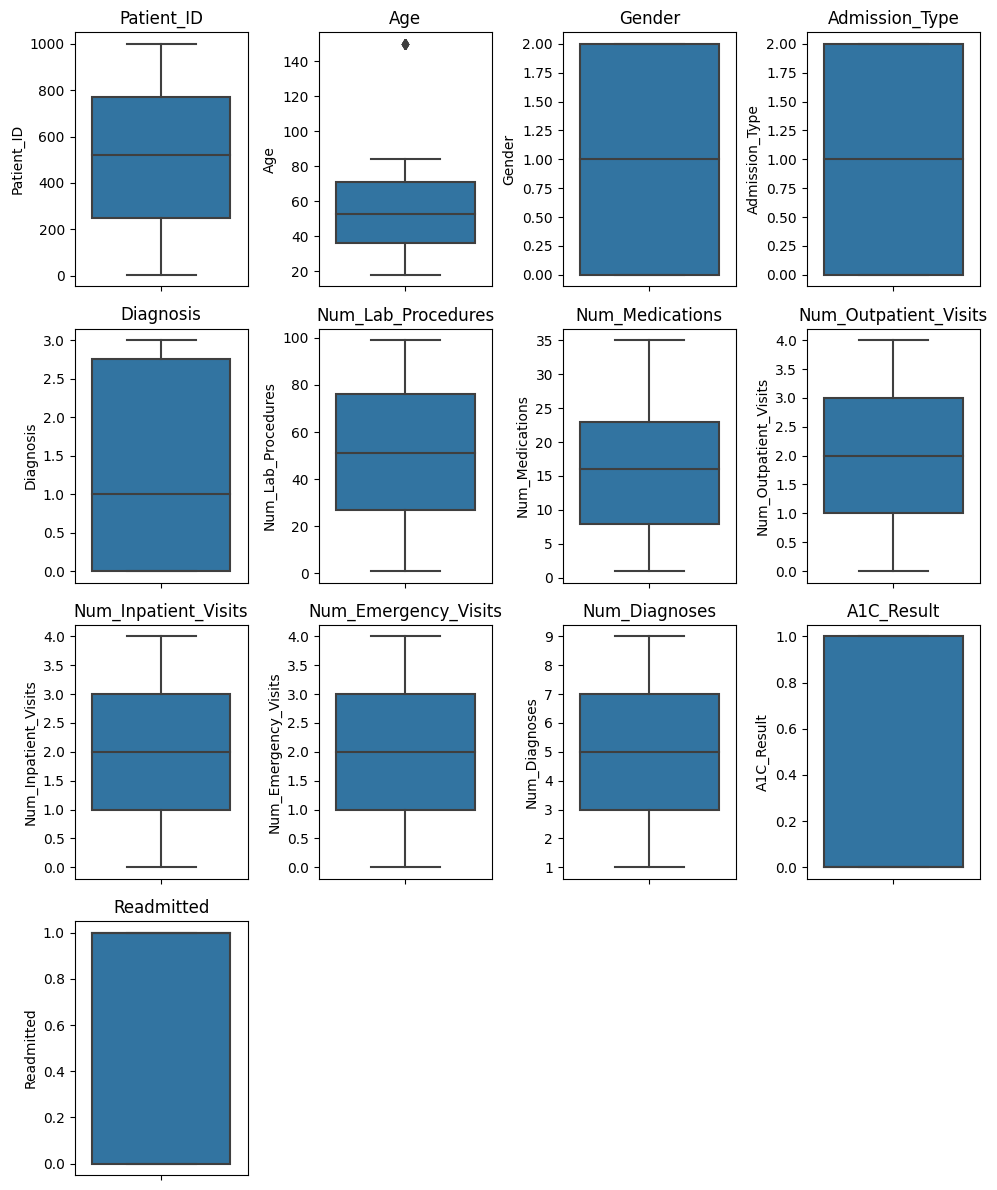

In [773]:
columns = A1C_Not_Null.columns
plot_box_plots(A1C_Not_Null, columns)

In [774]:
# Find outlier using IQR

In [775]:
# Calculate quartiles and IQR
Q1 = A1C_Not_Null.quantile(0.25)
Q3 = A1C_Not_Null.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = A1C_Not_Null[(A1C_Not_Null < lower_bound) | (A1C_Not_Null > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Patient_ID               0
Age                      9
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [776]:
# find outlier using Z-score

In [777]:
df_age = A1C_Not_Null["Age"]

In [778]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(df_age)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [150, 150, 150, 150, 150, 150, 150, 150, 150]


In [779]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df["Age_New"] = df[col].clip(lower_threshold, upper_threshold)

In [780]:
outlier(A1C_Not_Null,"Age")

In [781]:
# Box plot after handling outlier

<AxesSubplot:ylabel='Age_New'>

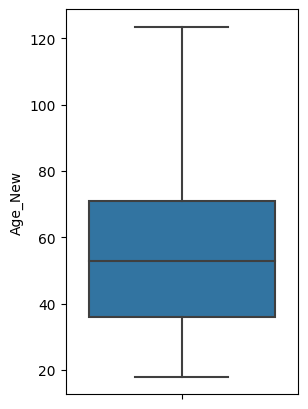

In [782]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=A1C_Not_Null, y=A1C_Not_Null["Age_New"])

In [783]:
A1C_Not_Null.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,566.0,509.724382,290.966303,3.0,250.5,520.5,768.75,1000.0
Age,566.0,53.899293,23.053353,18.0,36.0,53.0,71.00,150.0
Gender,566.0,0.964664,0.812832,0.0,0.0,1.0,2.00,2.0
Admission_Type,566.0,0.959364,0.807120,0.0,0.0,1.0,2.00,2.0
Diagnosis,566.0,1.450530,1.150694,0.0,0.0,1.0,2.75,3.0
Num_Lab_Procedures,566.0,50.448763,28.663751,1.0,27.0,51.0,76.00,99.0
Num_Medications,566.0,15.646643,8.336860,1.0,8.0,16.0,23.00,35.0
Num_Outpatient_Visits,566.0,1.996466,1.395310,0.0,1.0,2.0,3.00,4.0
Num_Inpatient_Visits,566.0,1.959364,1.410495,0.0,1.0,2.0,3.00,4.0
Num_Emergency_Visits,566.0,1.945230,1.411271,0.0,1.0,2.0,3.00,4.0


In [784]:
# droping the 'age' column

In [785]:
A1C_Not_Null_1 = A1C_Not_Null.drop(columns=["Age"], axis=1)

## Handling Skwness

In [786]:
# Function for histogram 
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon") 
        plt.title(col)
    plt.tight_layout()
    plt.show()

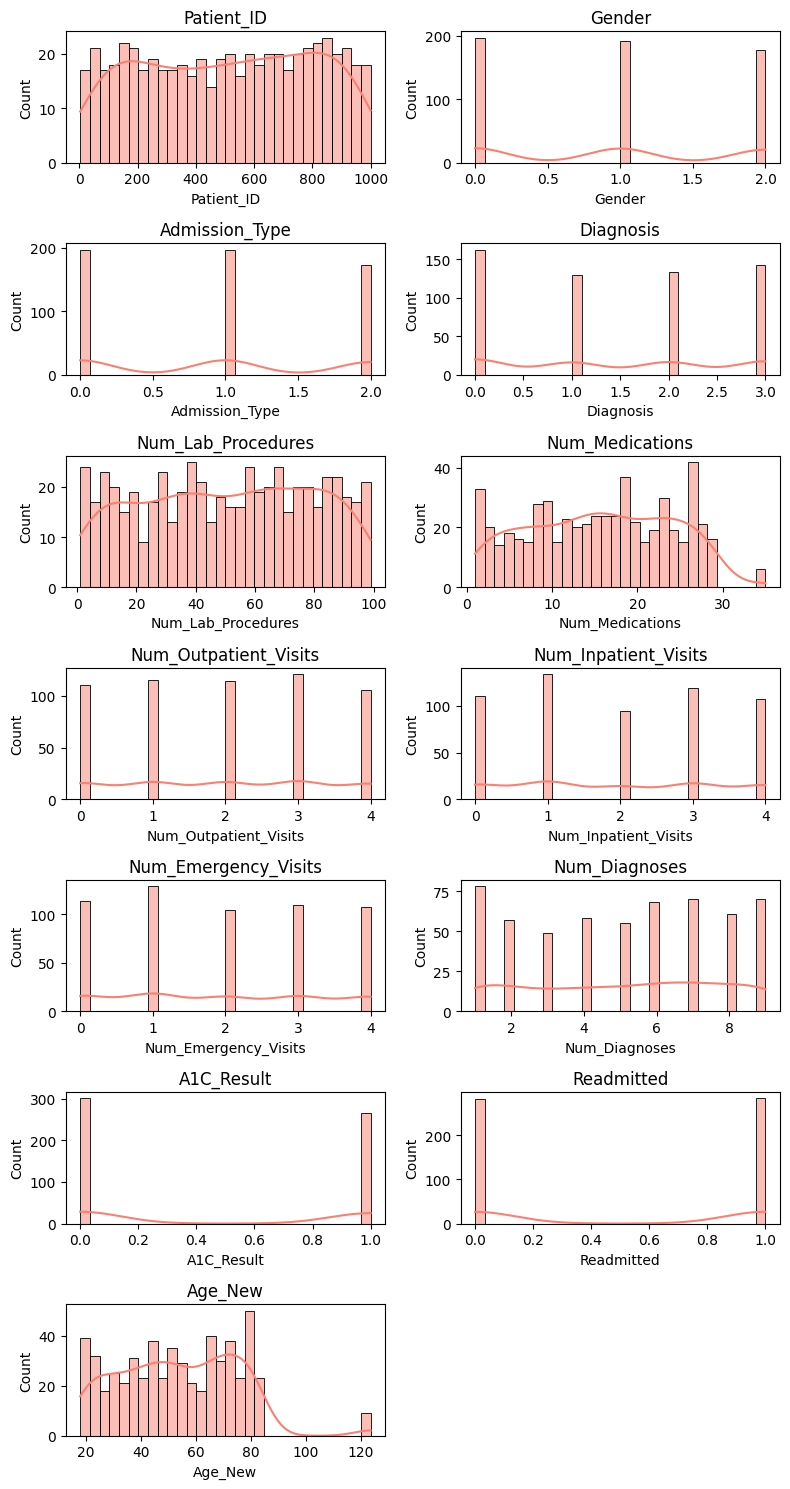

In [787]:
columns = A1C_Not_Null_1.columns
plot_histograms(A1C_Not_Null_1, columns)

In [788]:
A1C_Not_Null_1.skew()

Patient_ID              -0.058455
Gender                   0.064814
Admission_Type           0.074008
Diagnosis                0.051406
Num_Lab_Procedures      -0.067852
Num_Medications         -0.010890
Num_Outpatient_Visits   -0.009376
Num_Inpatient_Visits     0.057011
Num_Emergency_Visits     0.074561
Num_Diagnoses           -0.084812
A1C_Result               0.127806
Readmitted              -0.007086
Age_New                  0.332362
dtype: float64

    Skewness is a measure of lack of symmetry
    Skewness value range from -1 to 1:

- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
- If the skewness is greater than 0.5, the distribution is positively skewed (right-skewed).

# Feature Selection

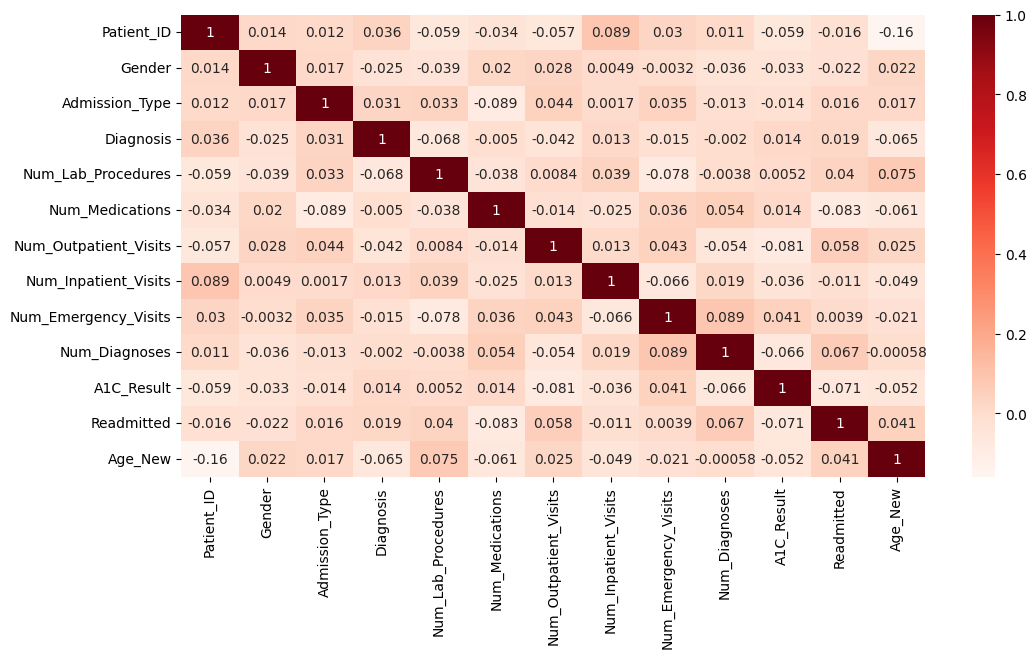

In [789]:
# head map
plt.figure(figsize=(12,6))
sns.heatmap(A1C_Not_Null_1.corr(), annot=True, cmap="Reds")
plt.show()

In [790]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [791]:
calc_vif(A1C_Not_Null_1)

,variables,VIF
0,Patient_ID,3.655061
1,Gender,2.330180
2,Admission_Type,2.370796
3,Diagnosis,2.459543
4,Num_Lab_Procedures,3.815165
5,Num_Medications,4.015730
6,Num_Outpatient_Visits,2.915883
7,Num_Inpatient_Visits,2.835830
8,Num_Emergency_Visits,2.866921
9,Num_Diagnoses,4.304706


Variance Inflation Factor
-  VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
- VIF values between 5 and 10 suggest moderate multicollinearity.
- VIF values above 10 indicate potentially severe multicollinearity. 

In [792]:
# Droping the multicollinearity & unwanted columns             

In [793]:
A1C_Not_Null_2 = A1C_Not_Null_1.drop(columns=["Age_New","Patient_ID"], axis=1)

In [794]:
calc_vif(A1C_Not_Null_2)

,variables,VIF
0,Gender,2.253954
1,Admission_Type,2.318353
2,Diagnosis,2.399551
3,Num_Lab_Procedures,3.543695
4,Num_Medications,3.875371
5,Num_Outpatient_Visits,2.836786
6,Num_Inpatient_Visits,2.713951
7,Num_Emergency_Visits,2.792111
8,Num_Diagnoses,4.092847
9,A1C_Result,1.799921


In [795]:
A1C_Not_Null_2.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [796]:
A1C_Not_Null_2.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
2,0,2,1,75,29,4,0,3,5,1,0
7,0,0,1,28,19,4,0,3,7,1,1
8,1,2,2,70,23,1,2,4,6,1,0
9,1,1,3,41,24,4,0,0,3,0,0
11,0,1,3,68,14,2,4,2,5,0,0


In [797]:
A1C_Not_Null_2.shape

(566, 11)

In [798]:
# saving with actual A1C values

A1C_Not_Null_2.to_csv("hospital_with_actual_A1C.csv", index= False)

#   Model to Predict A1C Values

In [799]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


import pickle

In [800]:
A1C_Not_Null_2.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result', 'Readmitted'],
      dtype='object')

In [801]:
A1C_Not_Null_2["A1C_Result"].value_counts()

A1C_Result
0    301
1    265
Name: count, dtype: int64

In [802]:
# Data Splitting

x = A1C_Not_Null_2.drop(columns=["A1C_Result"],axis=1) #independent variables.
y = A1C_Not_Null_2["A1C_Result"] #dependent variable

### Handling Imbalanced feature &rarr; "SMOTE-Tomek"

This method combines 
* SMOTE ability to generate synthetic data for minority class 
* Tomek has ability to remove the data that are identified as Tomek links from the majority class
* Tomek links are pairs of instances from different classes that are very close to each other, but they are of different classes.

In [803]:
# Logistic Regression

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=40)

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "Logistic Regression",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'Logistic Regression', 'Accuracy_Train': 0.5553097345132744, 'Accuracy_Test': 0.5350877192982456}


In [804]:
# SVM Classification

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=40)

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
model = svm.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "SVM",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'SVM', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5614035087719298}


In [805]:
# Other classification algorithms

def accuracy_checking(x_data, y_data, algorithm):
    
    # splitting train & test
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=50)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [806]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5350877192982456}


{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5350877192982456}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5087719298245614}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.6349557522123894, 'Accuracy_Test': 0.4298245614035088}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.9092920353982301, 'Accuracy_Test': 0.543859649122807}


## Cross Validation

In [807]:
# StratifiedKFold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Instantiate the classification model
A1C_Model = GradientBoostingClassifier()

# Instantiate Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate accuracy for each fold
accuracy_scores = cross_val_score(model, x, y, scoring='accuracy', cv=skf)
mean_accuracy = np.mean(accuracy_scores)

# Print
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)


Accuracy scores for each fold: [0.53508772 0.53097345 0.53097345 0.53097345 0.53097345]
Mean Accuracy: 0.531796304921596


In [808]:
# Selected Model
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

A1C_Model = GradientBoostingClassifier().fit(x_train, y_train)
 
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

### Performance Metrics

In [809]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9092920353982301
Accuracy_Test:  0.9210526315789473


In [810]:
# confution matrics 

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[61  0]
 [ 9 44]]


In [811]:
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        61
           1       1.00      0.83      0.91        53

    accuracy                           0.92       114
   macro avg       0.94      0.92      0.92       114
weighted avg       0.93      0.92      0.92       114



In [812]:
# Receiver Operating Characteristic (ROC) Curve

FP, TP, Threshold = roc_curve(y_true=y_test, y_score=y_pred_test)

print(FP)
print(TP)
print(Threshold)


[0. 0. 1.]
[0.         0.83018868 1.        ]
[2 1 0]


In [813]:
# Area Under the Curve (AUC)

auc_curve = auc(x=FP, y=TP)
print("auc_curve: ", auc_curve)

auc_curve:  0.9150943396226415


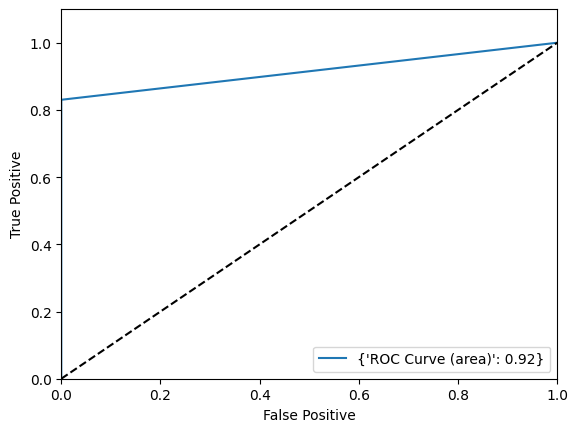

In [814]:
# create a plot for ROC and AUC curve

roc_point= {"ROC Curve (area)":round(auc_curve, 2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [815]:
# Saving the Model unsing pickle
with open("A1C_Model.pkl","wb") as m:
    pickle.dump(A1C_Model, m)